# Working with Unlabeled Data – Clustering Analysis

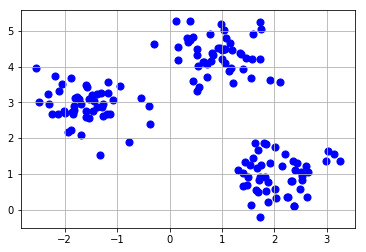

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c='blue', marker='o', s=50)
plt.grid()
plt.show()

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random',
            n_init=10, max_iter=300, tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

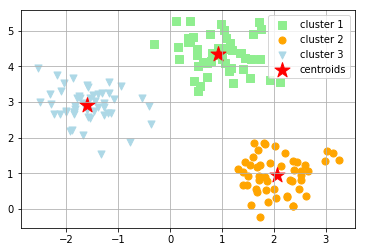

In [3]:
plt.scatter(X[y_km==0,0],
            X[y_km==0,1],
            s=50,
            c='lightgreen',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km==1,0],
            X[y_km==1,1],
            s=50,
            c='orange',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km==2,0],
            X[y_km==2,1],
            s=50,
            c='lightblue',
            marker='v',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            s=250,
            marker='*',
            c='red',
            label='centroids')
plt.legend(loc='best')
plt.grid()
plt.show()

#### C-Means not implemented!

## Using the elbow method to fnd the optimal number of clusters

In [4]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


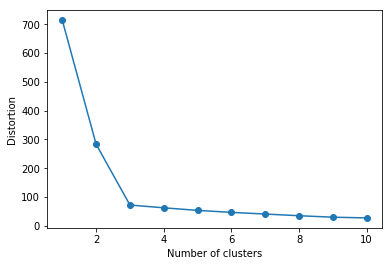

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++',
                n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

## Quantifying the quality of clustering via silhouette plots

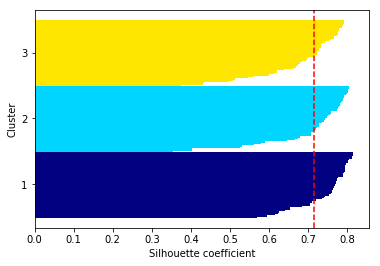

In [6]:
km = KMeans(n_clusters=3, init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, 
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

In [7]:
silhouette_samples(X, y_km, metric='euclidean')

array([ 0.75956181,  0.43233677,  0.7747553 ,  0.72286402,  0.76729229,
        0.72280273,  0.69484791,  0.76101499,  0.77303671,  0.67320272,
        0.62375802,  0.40348569,  0.80092777,  0.73225118,  0.59884632,
        0.78954087,  0.75955598,  0.81572606,  0.79897477,  0.7936958 ,
        0.72221435,  0.76384238,  0.72671597,  0.73219594,  0.74183186,
        0.81463826,  0.76045682,  0.62065362,  0.57912988,  0.76929277,
        0.707709  ,  0.8045906 ,  0.7116979 ,  0.78561661,  0.66997314,
        0.65285806,  0.68519649,  0.77015391,  0.72638012,  0.77905009,
        0.56028722,  0.70806176,  0.66201873,  0.77669657,  0.79206045,
        0.79499104,  0.67874476,  0.43073904,  0.72878986,  0.75911278,
        0.61479508,  0.68506268,  0.76602547,  0.80521304,  0.79571018,
        0.77872478,  0.63708395,  0.62515462,  0.58878683,  0.7767243 ,
        0.72889549,  0.40154174,  0.80287718,  0.78189854,  0.76687374,
        0.35466307,  0.79135592,  0.56967556,  0.37334246,  0.54

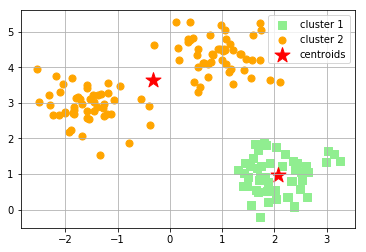

In [8]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km==0,0], X[y_km==0,1], s=50, 
            c='lightgreen', marker='s', 
            label='cluster 1')
plt.scatter(X[y_km==1,0], X[y_km==1,1], s=50,
            c='orange', marker='o', 
            label='cluster 2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], 
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.show()

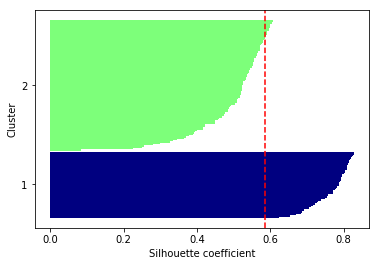

In [9]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## Organizing clusters as a hierarchical tree

In [10]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X = np.random.random_sample([5,3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [11]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels, index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


In [12]:
from scipy.cluster.hierarchy import linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean')
    Performs hierarchical/agglomerative clustering.
    
    The input y may be either a 1d compressed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d compressed distance matrix,
    then y must be a :math:`{n \choose 2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the number of original
  

In [13]:
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
# or 
row_clusters = linkage(df.values, method='complete', metric='euclidean')

In [14]:
pd.DataFrame(row_clusters, columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
             index=['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


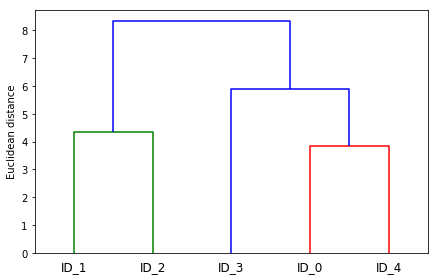

In [15]:
from scipy.cluster.hierarchy import dendrogram
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])
row_dendr = dendrogram(row_clusters, labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                      )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Attaching dendrograms to a heat map

In [16]:
# We create a new figure object and defne the x axis position, y axis
# position, width, and height of the dendrogram via the add_axes attribute.
# Furthermore, we rotate the dendrogram 90 degrees counter-clockwise.

fig = plt.figure(figsize=(8,8), facecolor='white')
axd = fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr = dendrogram(row_clusters, orientation='left')
# note: for matplotlib >= v1.5.1, please use orientation=‘left’

In [17]:
# Next we reorder the data in our initial DataFrame according to the clustering
# labels that can be accessed from the dendrogram object, which is essentially a
# Python dictionary, via the leaves key.

df_rowclust = df.iloc[row_dendr['leaves'][::-1]]
df_rowclust

,X,Y,Z
ID_4,4.385722,0.596779,3.980443
ID_0,6.964692,2.861393,2.268515
ID_3,3.921175,3.431780,7.290497
ID_2,9.807642,6.848297,4.809319
ID_1,5.513148,7.194690,4.231065


In [18]:
# Now we construct the heat map from the reordered DataFrame and position
# it right next to the dendrogram:
    
axm = fig.add_axes([0.23,0.1,0.6,0.6])
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')

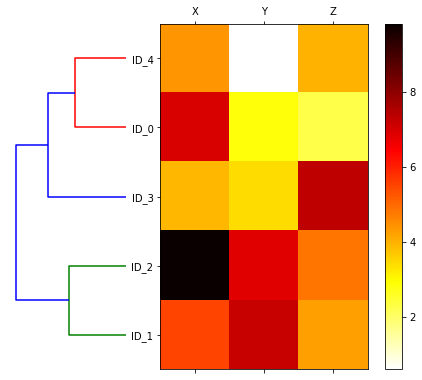

In [19]:
# Finally we will modify the aesthetics of the heat map by removing the axis
# ticks and hiding the axis spines. Also, we will add a color bar and assign
# the feature and sample names to the x and y axis tick labels, respectively.

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

## Applying agglomerative clustering via scikit-learn

In [20]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


## Locating regions of high density via DBSCAN

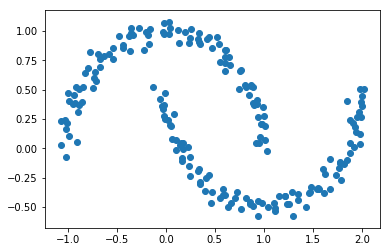

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)
plt.scatter(X[:,0], X[:,1])
plt.show()

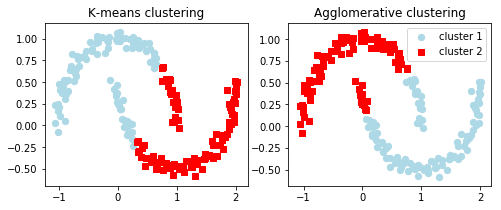

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],
            X[y_km==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km==1,0],
            X[y_km==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0],
            X[y_ac==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
ax2.scatter(X[y_ac==1,0],
            X[y_ac==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.show()

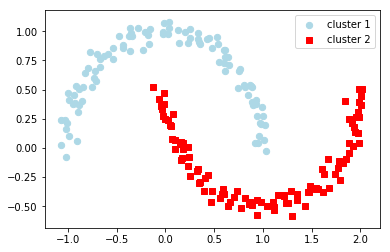

In [23]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db==0,0],
            X[y_db==0,1],
            c='lightblue',
            marker='o',
            s=40,
            label='cluster 1')
plt.scatter(X[y_db==1,0],
            X[y_db==1,1],
            c='red',
            marker='s',
            s=40,
            label='cluster 2')
plt.legend()
plt.show()

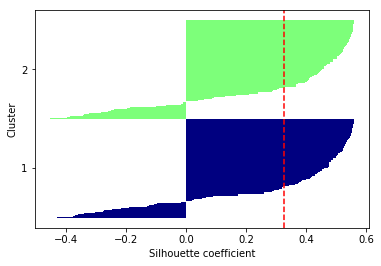

In [24]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_db)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_db, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_db == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, 
             height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

## zabawy

In [25]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)
y_db

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [26]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

param_grid = [{'eps': [0.1, 0.01, 0.001],
               'min_samples': [2, 3, 5],
               'metric':['euclidean']}]

np.asarray(ParameterGrid(param_grid))

s_scores = {}
for idx, v in enumerate(ParameterGrid(param_grid)):
    db = DBSCAN(**v)
    y_db = db.fit_predict(X)
    if len(np.unique(y_db)) == 1:
        s_scores[idx] = {'params': v, 'score': None}
    else:
        s_scores[idx] = {'params': v, 'score': silhouette_score(X, y_db)}

s_scores

{0: {'params': {'eps': 0.1, 'metric': 'euclidean', 'min_samples': 2},
  'score': 0.26121267978838114},
 1: {'params': {'eps': 0.1, 'metric': 'euclidean', 'min_samples': 3},
  'score': 0.33104240537978269},
 2: {'params': {'eps': 0.1, 'metric': 'euclidean', 'min_samples': 5},
  'score': 0.33742117624420997},
 3: {'params': {'eps': 0.01, 'metric': 'euclidean', 'min_samples': 2},
  'score': -0.29142724560244015},
 4: {'params': {'eps': 0.01, 'metric': 'euclidean', 'min_samples': 3},
  'score': None},
 5: {'params': {'eps': 0.01, 'metric': 'euclidean', 'min_samples': 5},
  'score': None},
 6: {'params': {'eps': 0.001, 'metric': 'euclidean', 'min_samples': 2},
  'score': None},
 7: {'params': {'eps': 0.001, 'metric': 'euclidean', 'min_samples': 3},
  'score': None},
 8: {'params': {'eps': 0.001, 'metric': 'euclidean', 'min_samples': 5},
  'score': None}}

In [27]:
ParameterGrid(param_grid)[2]

{'eps': 0.1, 'metric': 'euclidean', 'min_samples': 5}

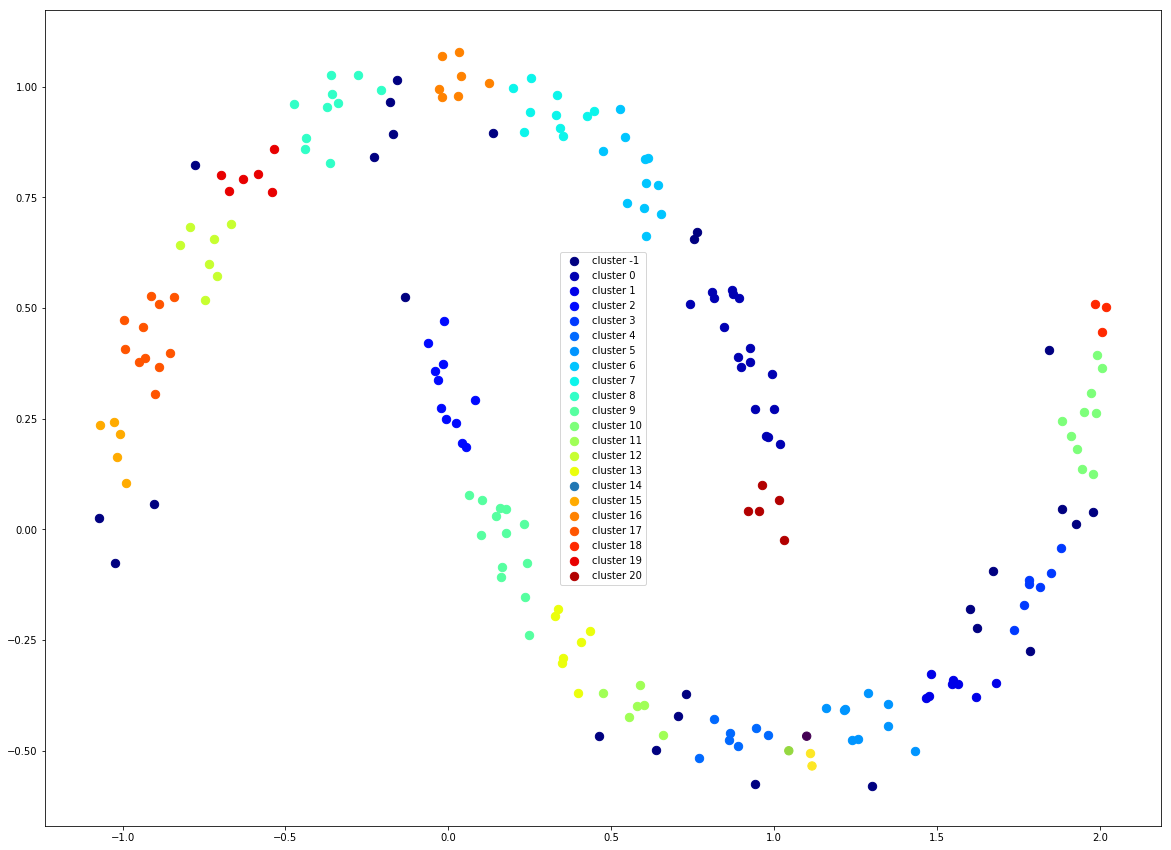

In [28]:
from matplotlib import cm

db = DBSCAN(**ParameterGrid(param_grid)[2])
y_db = db.fit_predict(X)

plt.figure(figsize=(20, 15))
for idx, cluster in enumerate(np.unique(y_db)):
    plt.scatter(X[y_db==cluster,0],
                X[y_db==cluster,1],
                c=cm.jet(idx / len(np.unique(y_db))),
                marker='o',
                s=70,
                label='cluster ' + str(cluster))

plt.legend(loc='best')
plt.show()